* Solves the Schrodinger equation in one dimension, for a potential given by the function 'potential(x,xmax)', for x in the range (-xmax,xmax).        
* The  integration of the wave functipn Psi(x) starts from boundary conditions applied to Psi(-xmax) and Psi(-xmax+h), where h is the integration step.           
* The boundary condition at x=xmax is taken to be Psi(xmax)=0.                 
* Bisection is used to find the energy (preceded by a course search for two energies bracketing a solution).                

In [40]:
function potential(x::Float64,xmax::Float64)::Float64
    v::Float64=0
    if abs(x) <= xmax/5
       v=-1000.
    end
    return v
 end 

 function normalize(n::Int64,h::Float64,psi)
    norm::Float64=psi[1]^2+psi[n]^2
    for i=2:n-3
      norm=norm+4*psi[i]^2+2*psi[i+1]^2
    end 
    norm=norm+4*psi[n-1]^2
    norm=1/(norm*h/3)^0.5
    psi.=psi.*norm
    return nothing
 end


normalize (generic function with 1 method)

This function solves the SE for given energy (ee)

The wave function is stored in the vector psi (function argument)


In [41]:
function numerov(nx::Int64,xmax::Float64,ee::Float64,psi)

    h::Float64=xmax/nx
    h2::Float64=h^2
    h12::Float64=h2/12

    psi[1]=0
    psi[2]=1.

    fn::Float64 = 2*(potential(-xmax,xmax)-ee)        
    q0::Float64 = psi[1]*(1-h12*fn)
    fn = 2*(potential(-xmax+h,xmax)-ee)        
    q1::Float64 = psi[2]*(1-h12*fn)

    for n=3:2*nx+1
       q2::Float64 = h2*fn*psi[n-1]+2*q1-q0
       fn = 2*(potential(n*h-xmax,xmax)-ee)        
       psi[n] = q2/(1-h12*fn)
       q0=q1
       q1=q2
    end  
    normalize(2*nx+1,h,psi)

 end 


numerov (generic function with 1 method)

This function starts with a course monotonic search for an energy
bracket, starting at e1 and using incremental steps de. In a subsequent
bisection procedure, the energy window is halved until the difference is
less than eps.


In [42]:
function matchboundary(nx,xmax,e1,de,eps,psi)

    numerov(nx,xmax,e1,psi) 
    b1=psi[2*nx+1]  
    e2=e1
    b2=b1
    for i=1:200
      e2=e2+de
      numerov(nx,xmax,e2,psi)
      b2=psi[2*nx+1]
      if b1*b2 < 0 
         break
      end
      e1=e2
      b1=b2
    end
    println(e1,"  ",e2)

    while abs(e1-e2) > eps
       e3=(e1+e2)/2
       numerov(nx,xmax,e3,psi)
       b3=psi[2*nx+1]
       if b3*b1 <= 0 
          e2=e3      
          b2=b3 
       else
          e1=e3
          b1=b3
       end
       println(b1,"  ",b2)
    end

    return (e1+e2)/2

 end

matchboundary (generic function with 1 method)

Run program

In [43]:

nx=10000     # number of x intervals on each sode of x=0
xmax=1.0     # hard walls at x=-xmax and x=+xmax
e0=-20.      # initial energy in search for bracket
de=1.        # step size in search for bracket
eps=10^(-6)  # energy tolerance  

dx=xmax/nx 

psi = zeros(Float64,2*nx+1)
x = zeros(Float64,2*nx+1)
v = zeros(Float64,2*nx+1)

ee=matchboundary(nx,xmax,e0,de,eps,psi)
println(ee)

for i=1:2*nx+1
    x[i]=(i-1)*dx-xmax
    v[i]=potential(x[i],xmax)
end 

# The potential and the wave function are plotted in the same graph
# - they are normalized to occupy the saame scale for better visibility

v .= v./maximum(abs.(v))
psi .= psi./maximum(abs.(psi));

6.0  7.0
0.13243665456676118  -0.0361688886427598
0.050751727460371716  -0.0361688886427598
0.00739617773539911  -0.0361688886427598
0.00739617773539911  -0.014513849965925557
0.00739617773539911  -0.003565796989045624
0.0019159972257327081  -0.003565796989045624
0.0019159972257327081  -0.0008249934989295055
0.0005455167684731719  -0.0008249934989295055
0.0005455167684731719  -0.00013973934255080714
0.00020288909261577477  -0.00013973934255080714
3.157490932864074e-5  -0.00013973934255080714
3.157490932864074e-5  -5.4082224122410804e-5
3.157490932864074e-5  -1.1253670380842867e-5
1.016061418703304e-5  -1.1253670380842867e-5
1.016061418703304e-5  -5.465082781825725e-7
4.807034613332464e-6  -5.465082781825725e-7
2.130278235861931e-6  -5.465082781825725e-7
7.91893152945994e-7  -5.465082781825725e-7
1.226710855743508e-7  -5.465082781825725e-7
1.226710855743508e-7  -2.1192029433964278e-7
6.8960862159729


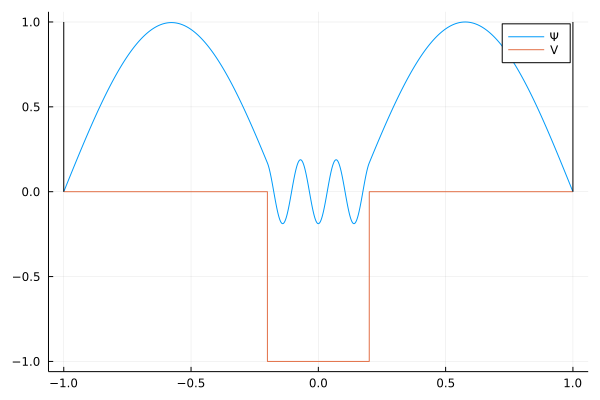

In [44]:

using Plots

plot(x,psi, label="Ψ")
plot!(x,v, label="V")
plot!([-xmax, -xmax], [0, 1], c="black", label="")
plot!([xmax, xmax], [0, 1], c="black", label="")

